<a href="https://colab.research.google.com/github/LucasMelvin15/Pytorch_deeplearning/blob/main/02neural_network_classification_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Neural network classification with PyTorch

Classification is a problem of predicting whether something is one thing or the other.

## 1. Make classification data and get it ready

In [1]:
import sklearn #ml library for predictive data analysis

In [2]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

#create circles
X,y = make_circles(n_samples,
                   noise= 0.03,
                   random_state=42)

#X is features and y is labels

In [3]:
len(X) ,len(y)

(1000, 1000)

In [4]:
print(f"First 5 samples of X: \n{X[:5]}")
print(f"First 5 samples of y: \n{y[:5]}")

First 5 samples of X: 
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y: 
[1 1 1 1 0]


In [5]:
# Make a Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "label":y})
circles.head(20)

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


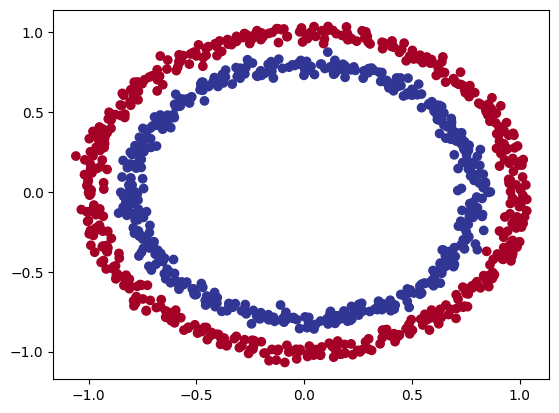

In [6]:
#visualize the data
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu);

**Toy datasets**- a dateset small enough to experiment but sizeable enough to practise fundamentals

### Input and output shapes

In [7]:
X.shape, y.shape

#input is a vector with 2 features, output is a scalar with one feature

((1000, 2), (1000,))

In [8]:
#view the first value of  features and labels

X_sample = X[0]
y_sample =y[0]


print(f"Values for the first sample of x: {X_sample} while for y value is: {y_sample}")
print(f"Shape of the first sample of x: {X_sample.shape} while y value shape is: {y_sample.shape}")


Values for the first sample of x: [0.75424625 0.23148074] while for y value is: 1
Shape of the first sample of x: (2,) while y value shape is: ()


### Turn the data into tensors

In [9]:
import torch
torch.__version__

'2.3.0+cu121'

In [10]:
type(X), type(y), X.dtype, y.dtype


#X and y are numpy arrays and therefore should be converted to tensors

(numpy.ndarray, numpy.ndarray, dtype('float64'), dtype('int64'))

In [11]:
#turn data into tensors
import numpy as np


X = torch.from_numpy(np.array(X)).type(torch.float) #handle the data and type
y = torch.from_numpy(np.array(y)).type(torch.float)
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
X.dtype, y.dtype, type(X), type(y)



(torch.float32, torch.float32, torch.Tensor, torch.Tensor)

## Split data into test and train sets
1. We'll use test_size=0.2 (80% training, 20% testing) and because the split happens randomly across the data, let's use random_state=42 so the split is reproducible.
2. Make use of `train_test_split()` from Scikit_Learn

In [13]:
from sklearn.model_selection import train_test_split

#features first followed by labels
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size= 0.2,
                                                    random_state=42)
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Build a model
1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing nn.Module.
3. Defining a loss function and optimizer.
4. Creating a training loop

In [14]:
import torch
from torch import nn

#set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [16]:
# 1. Constructing a model by subclassing nn.Module.
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create nn.linear layers capable of handling our data
        # nn.linear performs linear computation to incoming data
        self.layer_1 = nn.Linear(in_features=2, out_features=16) #takes in two features of X and and outputs 5
        self.layer_2 = nn.Linear(in_features=16, out_features=1) #takes in 5 features of X and gives 1 output of y

        # 3. Define a forward method that outlines the forward pass
    def forward(self, x):
      #return the output of layer2 same shape as y
      #computation goes thru x -> layer_1 -> layer_2 -> output
        return self.layer_2(self.layer_1(x))


model_0 = CircleModelV0().to(device)
model_0


CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=16, bias=True)
  (layer_2): Linear(in_features=16, out_features=1, bias=True)
)

In [17]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [18]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1526,  0.3074],
                      [ 0.3155, -0.2475],
                      [-0.2916,  0.4975],
                      [-0.5198,  0.2823],
                      [ 0.3109, -0.2970]])),
             ('0.bias', tensor([ 0.3906, -0.1895, -0.5002, -0.2667, -0.7021])),
             ('1.weight',
              tensor([[-0.2764, -0.2951,  0.1907, -0.4331, -0.3628]])),
             ('1.bias', tensor([0.4001]))])

In [19]:
#untrained_preds = model_0(X_test.to(device))
with torch.inference_mode():
  untrained_preds = model_0(X_test)

print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}")


Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])


In [20]:
print(f"first 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"first 10 labels: \n{y_test[:10]}")

first 10 predictions: 
tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])
first 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [21]:
###Defining a loss function and optimizer.

#1. create a loss function
loss_fn = nn.BCEWithLogitsLoss() #This loss combines a Sigmoid layer and the BCELoss in one single class

#2. set up an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                        lr=0.1)

In [22]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1526,  0.3074],
                      [ 0.3155, -0.2475],
                      [-0.2916,  0.4975],
                      [-0.5198,  0.2823],
                      [ 0.3109, -0.2970]])),
             ('0.bias', tensor([ 0.3906, -0.1895, -0.5002, -0.2667, -0.7021])),
             ('1.weight',
              tensor([[-0.2764, -0.2951,  0.1907, -0.4331, -0.3628]])),
             ('1.bias', tensor([0.4001]))])

In [23]:
# Create an evaluation metric to calculate accuracy
#compares the predictions to ground truth labels
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc
#y_true is the actual label for each sample
# y_pred - This is the predicted probability that the sample belongs to the positive class (class 1). It’s the output of your model.

## Train the model
1. call the train method
2. Do the forward pass
3. calculate the loss
4. Zero the gradients - optimizer zero grad
5. Loss backward (backpropagation)
6. Optimizer step (gradient descent)

# Going from raw logits -> Prediction Probabilities -> Prediction Labels

The model outputs are raw **logits**

We can convert these raw **logits** to **prediction probabilities** by passing them some kind of activation function (eg sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them off or taking the `argmax()`

In [24]:
#view the first outputs of the forward pass on the test data
model_0.eval()
with  torch.inference_mode():
  y_logits = model_0(X_test)[:5]
y_logits

tensor([[0.6992],
        [0.6875],
        [0.6566],
        [0.7116],
        [0.5405]])

In [25]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [26]:
#Use the  sigmoid activation function on the model's logits data to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6680],
        [0.6654],
        [0.6585],
        [0.6707],
        [0.6319]])

For our prediction probablity values, we need to perform a range-style rounding on them:
`torch.round()`
* `y_preds_probs` >0.5, `y=1` (class 1)

* `y_preds_probs` <0.5, `y=0` (class 0)


In [27]:
# find the predicted labels
y_preds = torch.round(y_pred_probs)

#in full (logits -> predicted probabilities -> predicted lables)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))

#check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

#squeeze removes all dimensions of size 1
y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([1., 1., 1., 1., 1.])

## Building a training and test loop


In [28]:
#set a random seed
torch.manual_seed(42)

# set the number of epochs
epochs = 1000

#Building a training loop

for epoch in range(epochs):
  ### Training
  model_0.train()

  ###1. Forward pass
  #model outputs raw logits
  y_logits = model_0(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  ### 2. calculate the loss
  loss = loss_fn(y_logits,y_train) # nn.BCEWithLogitsLoss expects raw logits as input

  acc = accuracy_fn(y_true=y_train,
                     y_pred=y_preds)

  ### 3.optimizer zero grad
  optimizer.zero_grad()

  ### 4. Backpropagation
  loss.backward()

  ### 5.optimizer step
  optimizer.step()

  ####testing
  model_0.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # calculate loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)

    ##Print whats happening every 10 epochs
    if epoch % 10 == 0:
      print(f"Epoch:{epoch} | Loss: {loss: .5f} | Accuracy: {acc: .2f}% | Test loss:{test_loss: .5f} | Test acc:{test_acc: .2f}%")


Epoch:0 | Loss:  0.74108 | Accuracy:  50.00% | Test loss: 0.73696 | Test acc: 50.00%
Epoch:10 | Loss:  0.70728 | Accuracy:  50.00% | Test loss: 0.70653 | Test acc: 50.00%
Epoch:20 | Loss:  0.69741 | Accuracy:  50.00% | Test loss: 0.69755 | Test acc: 50.00%
Epoch:30 | Loss:  0.69451 | Accuracy:  50.00% | Test loss: 0.69488 | Test acc: 50.00%
Epoch:40 | Loss:  0.69364 | Accuracy:  55.12% | Test loss: 0.69408 | Test acc: 55.00%
Epoch:50 | Loss:  0.69335 | Accuracy:  51.62% | Test loss: 0.69383 | Test acc: 53.50%
Epoch:60 | Loss:  0.69324 | Accuracy:  51.38% | Test loss: 0.69375 | Test acc: 52.00%
Epoch:70 | Loss:  0.69318 | Accuracy:  50.50% | Test loss: 0.69374 | Test acc: 51.50%
Epoch:80 | Loss:  0.69315 | Accuracy:  50.75% | Test loss: 0.69374 | Test acc: 51.00%
Epoch:90 | Loss:  0.69312 | Accuracy:  50.88% | Test loss: 0.69376 | Test acc: 48.50%
Epoch:100 | Loss:  0.69310 | Accuracy:  50.62% | Test loss: 0.69379 | Test acc: 51.00%
Epoch:110 | Loss:  0.69308 | Accuracy:  50.50% | Test 

### Make Predictions and evaluate our model

Looks like the model is guessing randomly. Hence,

 we'll write some code to download and import the helper_functions.py script from the Learn PyTorch for Deep Learning repo.

It contains a helpful function called `plot_decision_boundary()` which creates a NumPy meshgrid to visually plot the different points where our model is predicting certain classes.



In [29]:
import requests

from pathlib import Path #create file paths

# download helper functions if its not alreday downloaded
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary


helper_functions.py already exists, skipping download


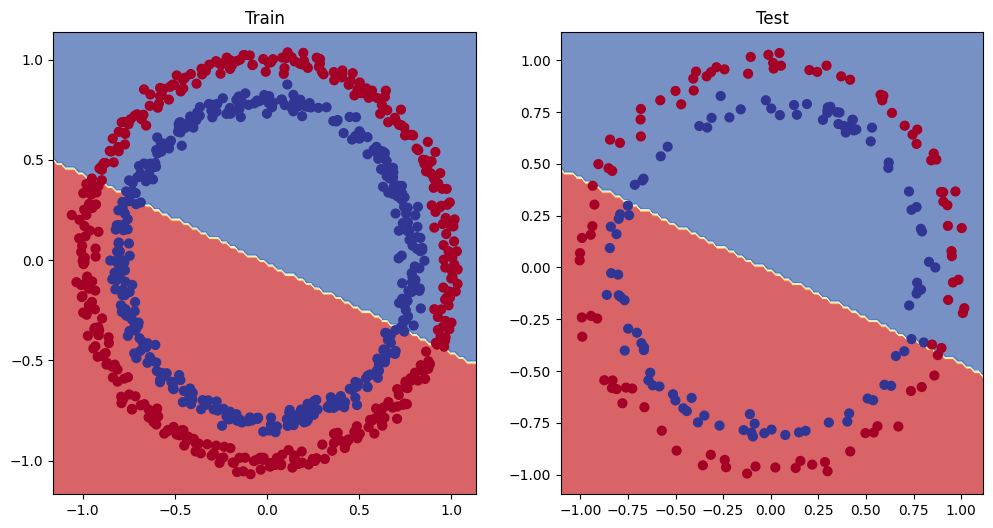

In [30]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)



It's currently trying to split the red and blue dots using a straight line...

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.

In machine learning terms, our model is underfitting, meaning it's not learning predictive patterns from the data.

How could we improve this?

## Improving a model (From a model perpective)

* Add more layers (nn.linear ie our model has just two layers)
* Increasing number of hidden units (in and out features)
* Fit for longer ie increasing number of epochs
* Change or adding activation functions
* Change the optimizer learning rate
* Change the loss function


In [31]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1()
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
#create a loss function
loss_function = nn.BCEWithLogitsLoss()

#create an optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr= 0.01)

In [33]:


#write a training and evaluation loop
torch.manual_seed(42)

epochs = 1000

for epoch in range(epochs):
  model_1.train()
  y_logits = model_1(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))
  loss = loss_function(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train, y_pred=y_preds)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_logits = model_0(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    # calculate loss/acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_preds)


  if epoch % 100 == 0:
      print(f"Epoch:{epoch} | Loss: {loss: .5f} | Accuracy: {acc: .2f}% | Test loss:{test_loss: .5f} | Test acc:{test_acc: .2f}%")


Epoch:0 | Loss:  0.69396 | Accuracy:  50.88% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:100 | Loss:  0.69369 | Accuracy:  50.25% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:200 | Loss:  0.69351 | Accuracy:  50.12% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:300 | Loss:  0.69339 | Accuracy:  50.50% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:400 | Loss:  0.69329 | Accuracy:  50.38% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:500 | Loss:  0.69322 | Accuracy:  49.88% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:600 | Loss:  0.69317 | Accuracy:  49.50% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:700 | Loss:  0.69313 | Accuracy:  49.38% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:800 | Loss:  0.69309 | Accuracy:  50.00% | Test loss: 0.69468 | Test acc: 46.00%
Epoch:900 | Loss:  0.69307 | Accuracy:  50.62% | Test loss: 0.69468 | Test acc: 46.00%


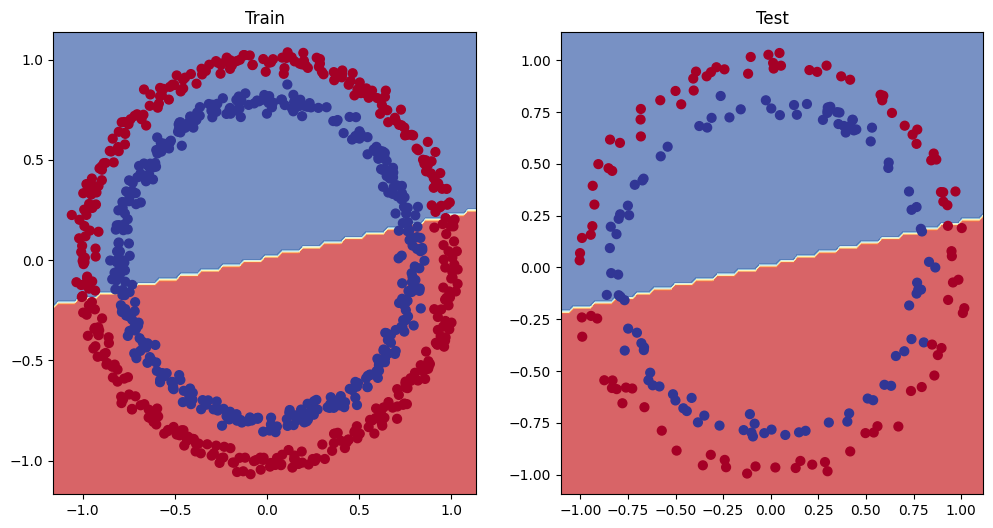

In [34]:
#plot decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

# Preparimg data to see if our model can fit a straight line

One way to trouble shoot a larger problem is to test out on a smaller problem

In [35]:
#create some data
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01 #(gives number of samples eg 100)

#create data
X_regression = torch.arange(start, end ,step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias #linear regression formula

#Check the data
print(len(X_regression), len(y_regression))
X_regression[:10], y_regression[:10]

100 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [36]:
#Create train and test splits

train_split= int(0.8*len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:],y_regression[train_split:]

#check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

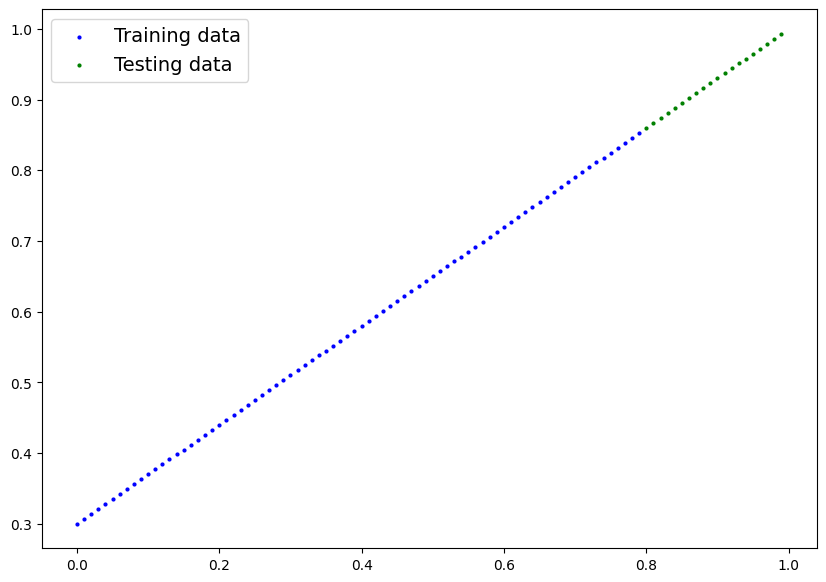

In [37]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression)

## Adjusting `model_1` to fit a straight line

In [38]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [39]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
#create a loss function
loss_fn = nn.L1Loss()

#create an optimizer
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [41]:
#train the model
torch.manual_seed(42)

epochs = 1000

#training
for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #testing
  model_2.eval()
  with torch.inference_mode():
   test_pred = model_2(X_test_regression)
   test_loss = loss_fn(test_pred, y_test_regression)

 # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.91103
Epoch: 100 | Train loss: 0.02858, Test loss: 0.00081
Epoch: 200 | Train loss: 0.02533, Test loss: 0.00209
Epoch: 300 | Train loss: 0.02137, Test loss: 0.00305
Epoch: 400 | Train loss: 0.01964, Test loss: 0.00341
Epoch: 500 | Train loss: 0.01940, Test loss: 0.00387
Epoch: 600 | Train loss: 0.01903, Test loss: 0.00379
Epoch: 700 | Train loss: 0.01878, Test loss: 0.00381
Epoch: 800 | Train loss: 0.01840, Test loss: 0.00329
Epoch: 900 | Train loss: 0.01798, Test loss: 0.00360


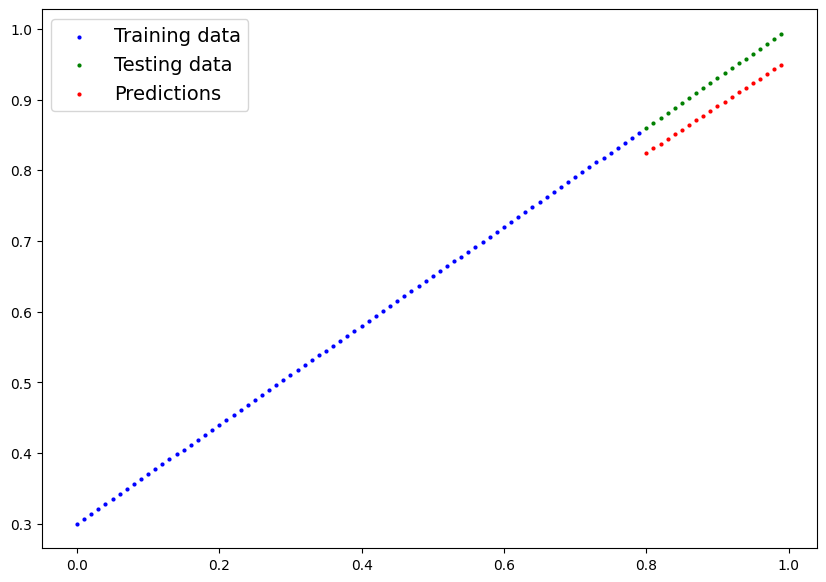

In [42]:
#turn on evaluation mode
model_2.eval()

#make predictions
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#plot data and predictions
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=y_preds)
#

### Non-linearity in machine learning models

Introducing non-linearity to the data since it works well with linear data

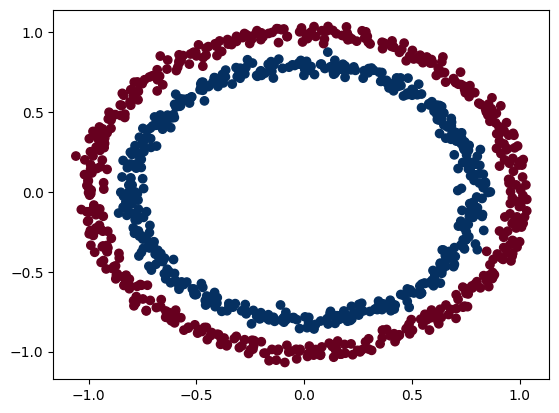

In [43]:
#make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:, 1], c=y,cmap=plt.cm.RdBu)

In [44]:
import torch
import numpy as np
from sklearn.model_selection import train_test_split

#turn data into tensors
X = torch.from_numpy(np.array(X)).type(torch.float)
y = torch.from_numpy(np.array(y)).type(torch.float)

#split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                               y,
                                               test_size = 0.2,
                                               random_state=42
                                                )
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

## Building a model with non-linearity

Made using non-linear activation functions eg `torch.nn.ReLu()` -Applies the rectified linear unit function element-wise.

In [45]:
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):

        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2()
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [46]:
# set up loss and optimizer function

#loss function
loss_fn = nn.BCEWithLogitsLoss()

#optimizer
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)

## Training a model with non-linearity

In [47]:
##set an random seed
torch.manual_seed(42)

##fit the model
epochs = 1000

##Training
for epoch in range(epochs):
  model_3.train()
  #forward pass
  y_logits= model_3(X_train).squeeze()
  y_preds = torch.round(torch.sigmoid(y_logits))

  #calculate loss
  loss = loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train, y_pred=y_preds)

  #optimizer zero grad
  optimizer.zero_grad()

  #backward pass
  loss.backward()

  #optimizer step
  optimizer.step()

  ##Testing
  model_3.eval()
  with torch.inference_mode():
    #forward pass
    test_logits = model_3(X_test).squeeze()
    test_preds = torch.round(torch.sigmoid(test_logits))

    #calculate loss
    test_loss = loss_fn(test_logits, y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_preds)

  if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test loss: 0.69102, Test acc: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test loss: 0.68940, Test acc: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test loss: 0.68723, Test acc: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test loss: 0.68411, Test acc: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test loss: 0.67941, Test acc: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test loss: 0.67285, Test acc: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test loss: 0.66322, Test acc: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test loss: 0.64757, Test acc: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test loss: 0.62145, Test acc: 79.00%


## Evaluatig a model trained on non-linear data

In [48]:
#make predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:5], y[:5]

(tensor([1., 0., 1., 0., 0.]), tensor([1., 1., 1., 1., 0.]))

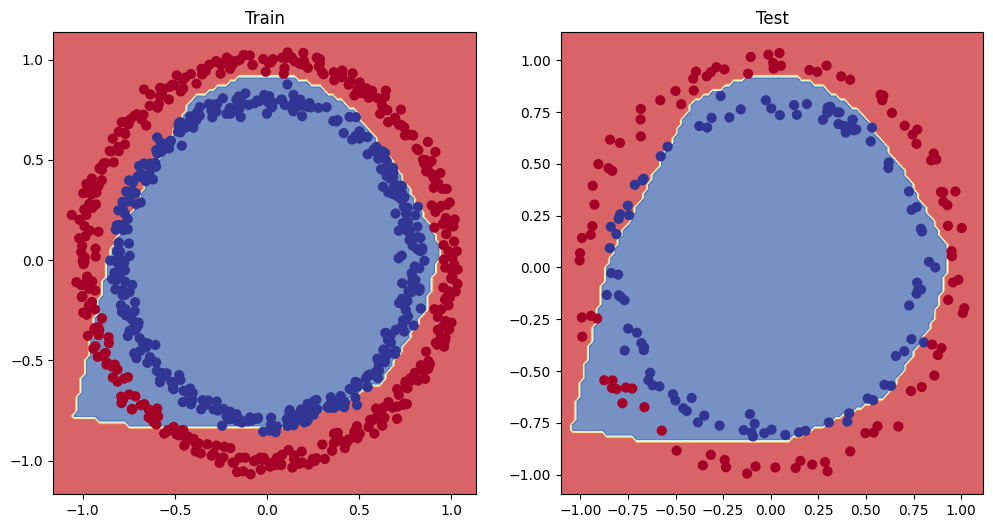

In [49]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity

## Replicating non-linear activation functions

How do non-linear activations work???

In [50]:
#make a simple dataset
A = torch.arange(-10,10,1, dtype= torch.float32)
A
A.dtype

torch.float32

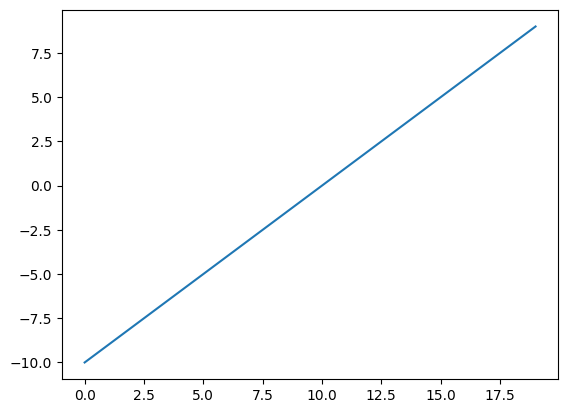

In [51]:
plt.plot(A)

## Activation functions

1. ReLu
The ReLU (Rectified Linear Unit) activation function is used in neural networks to introduce non-linearity into the model. This non-linearity allows the network to learn complex patterns and representations from the input data

formula =
ReLU(x)=(x)+ = max(0,x)

In [52]:
#create a ReLU function by hand
def relu(x):
   return torch.max(torch.tensor(0),x)

relu(A)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

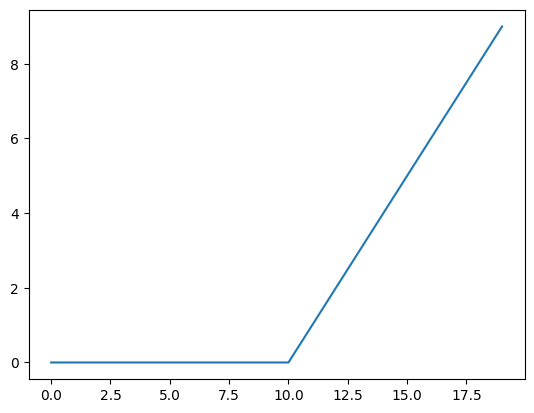

In [53]:
plt.plot(relu(A))

2.Sigmoid

In [54]:
#Create a custom sigmoid function
def sigmoid(x):
   return 1 / (1 + torch.exp(-x))

#test custom sigmoid on toy data
sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

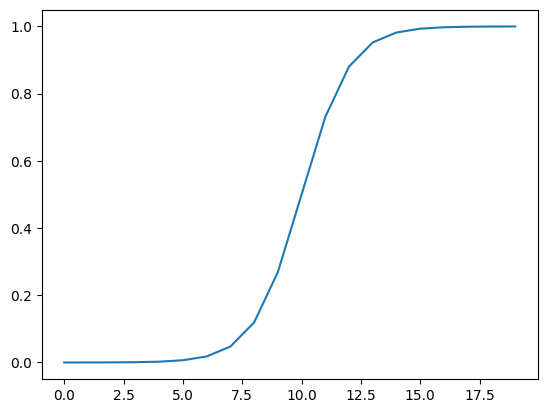

In [55]:
plt.plot(sigmoid(A))

##Multiclass classification problem

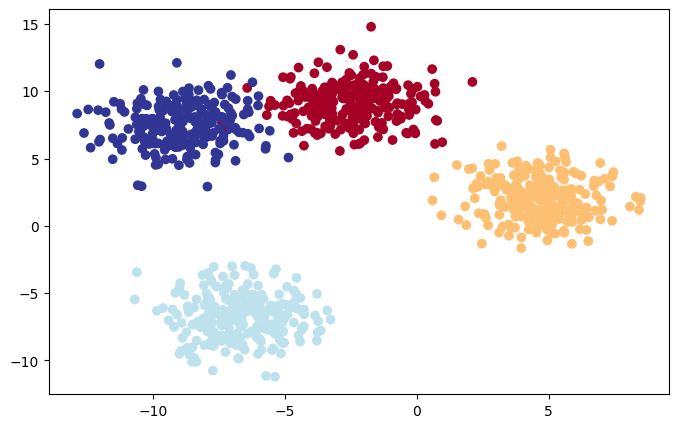

In [56]:
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import numpy as np

#set hyperparameters for data-creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

#create multiclass data
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

#turn data into tensors
X_blob = torch.from_numpy(np.array(X_blob)).type(torch.float)
y_blob = torch.from_numpy(np.array(y_blob)).type(torch.float)

#split data into train and test
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size= 0.2,
                                                                        random_state=RANDOM_SEED)
#plot data
plt.figure(figsize = (8,5))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)










In [57]:
X_blob.shape, y_blob.shape

(torch.Size([1000, 2]), torch.Size([1000]))

##Building a multi-class classification model

In [58]:
#build a multi-classmodel
class BlobModel(nn.Module):
  def __init__(self,input_features, output_features, hidden_units=8):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features = input_features, out_features =hidden_units),
          #nn.ReLU(),
          nn.Linear(in_features = hidden_units, out_features =hidden_units),
          #nn.ReLU(),
          nn.Linear(in_features = hidden_units, out_features =output_features),
    )
  def forward(self, x):
      return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8)
model_4




BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

##Create a loss function and optimizer for a multi-class model

In [59]:
#create a loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)

## Getting prediction probabilities for a multi-class PyTorch model

In order to evaluate, train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels

logits(raw outputs of our model) -> Pred probs (Use `torch.softmax`)-> Pred labels(Take the arg max of the prediction probabilities)

In [60]:
X_blob_train[:5]

#features =2 and labels =4

tensor([[ 5.0405,  3.3076],
        [-2.6249,  9.5260],
        [-8.5240, -9.0402],
        [-6.0262, -4.4375],
        [-3.3397,  7.2175]])

In [61]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [62]:
#convert our model's logit outputs to prediction probabilities

y_pred_probs = torch.softmax(y_logits, dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [63]:
#Convert prediction probabilities to prediction labels
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [64]:
y_blob_test

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0., 0., 1., 0., 0., 0., 3., 3., 2.,
        3., 3., 3., 0., 1., 2., 2., 2., 3., 0., 1., 0., 3., 1., 1., 3., 1., 2.,
        1., 3., 0., 2., 0., 3., 3., 2., 0., 3., 1., 1., 0., 3., 1., 0., 1., 1.,
        3., 2., 1., 1., 3., 2., 2., 0., 3., 2., 2., 0., 0., 3., 3., 0., 0., 3.,
        3., 3., 2., 3., 3., 3., 3., 1., 0., 2., 3., 2., 3., 3., 2., 3., 3., 2.,
        3., 3., 1., 3., 3., 3., 1., 0., 3., 2., 0., 0., 3., 0., 2., 3., 1., 0.,
        3., 2., 1., 1., 0., 2., 2., 3., 0., 0., 1., 2., 2., 3., 0., 1., 2., 0.,
        0., 0., 2., 3., 1., 2., 3., 2., 0., 3., 0., 0., 1., 1., 1., 0., 2., 2.,
        2., 2., 0., 3., 3., 2., 2., 1., 3., 2., 0., 0., 3., 3., 2., 1., 2., 0.,
        3., 2., 0., 3., 2., 0., 2., 2., 2., 0., 3., 1., 1., 1., 1., 1., 3., 1.,
        0., 2., 2., 1., 2., 2., 0., 1., 2., 2., 0., 0., 1., 3., 2., 0., 3., 1.,
        2., 1.])

##Create a training and test loops for a multi-class pytorch model

In [69]:
y_blob_train

tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0., 0., 0., 3., 2., 3., 2., 1., 1.,
        3., 2., 2., 2., 3., 1., 3., 2., 3., 0., 1., 0., 0., 1., 1., 3., 0., 2.,
        2., 1., 1., 3., 1., 1., 2., 3., 3., 0., 0., 0., 1., 0., 0., 0., 2., 0.,
        1., 1., 0., 0., 2., 2., 3., 1., 0., 2., 1., 3., 2., 2., 2., 1., 0., 2.,
        3., 1., 1., 1., 2., 0., 0., 1., 2., 3., 1., 3., 3., 2., 3., 3., 2., 2.,
        1., 0., 0., 1., 2., 1., 3., 1., 2., 1., 3., 3., 3., 0., 2., 1., 2., 3.,
        1., 1., 2., 0., 3., 3., 2., 0., 2., 0., 3., 2., 0., 0., 2., 2., 0., 1.,
        2., 0., 3., 3., 2., 3., 2., 1., 3., 1., 1., 1., 1., 0., 0., 1., 0., 2.,
        3., 0., 0., 0., 0., 0., 1., 0., 3., 0., 0., 2., 2., 0., 0., 3., 0., 3.,
        3., 3., 0., 2., 0., 1., 2., 2., 2., 3., 0., 1., 1., 0., 1., 2., 0., 3.,
        2., 1., 3., 2., 3., 0., 3., 1., 1., 2., 2., 2., 2., 2., 2., 0., 3., 3.,
        2., 1., 1., 2., 3., 1., 0., 0., 1., 3., 0., 1., 3., 3., 2., 3., 3., 3.,
        1., 0., 0., 1., 0., 3., 2., 1., 

In [70]:
y_logits

tensor([[-1.2711, -0.6494, -1.4740, -0.7044],
        [ 0.2210, -1.5439,  0.0420,  1.1531],
        [ 2.8698,  0.9143,  3.3169,  1.4027],
        ...,
        [-0.0148, -1.5722, -0.2221,  0.9874],
        [ 2.3231,  0.6656,  2.6783,  1.1564],
        [ 2.1249, -0.9140,  2.2318,  2.1890]], grad_fn=<AddmmBackward0>)

In [77]:
# fit the model to the data
torch.manual_seed(42)

#set the epochs
epochs = 100

#Build a training loop
for epoch in range(epochs):
  model_4.train()
  #1 forward pass
  y_logits = model_4(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1)
  y_pred_labels = torch.argmax(y_pred, dim=1)

  #2 calculate the loss
  loss = loss_fn(y_logits, y_blob_train.type(torch.LongTensor))
  acc = accuracy_fn(y_true=y_blob_train, y_pred=y_pred_labels)

  #3 optimizer zero grad
  optimizer.zero_grad()

  #4 backward pass
  loss.backward()

  #5 optimizer step
  optimizer.step()

  #testing
  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_blob_test)
    test_pred = torch.softmax(test_logits, dim=1)
    test_pred_labels = torch.argmax(test_pred, dim=1)
    test_loss = loss_fn(test_logits, y_blob_test.type(torch.LongTensor))
    test_acc = accuracy_fn(y_true=y_blob_test, y_pred=test_pred_labels)

  if epoch % 10==0:
   print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.02491, Accuracy: 99.25% | Test loss: 0.01388, Test acc: 99.50%
Epoch: 10 | Loss: 0.02486, Accuracy: 99.25% | Test loss: 0.01379, Test acc: 99.50%
Epoch: 20 | Loss: 0.02480, Accuracy: 99.25% | Test loss: 0.01371, Test acc: 99.50%
Epoch: 30 | Loss: 0.02475, Accuracy: 99.25% | Test loss: 0.01363, Test acc: 99.50%
Epoch: 40 | Loss: 0.02470, Accuracy: 99.25% | Test loss: 0.01356, Test acc: 99.50%
Epoch: 50 | Loss: 0.02465, Accuracy: 99.25% | Test loss: 0.01349, Test acc: 99.50%
Epoch: 60 | Loss: 0.02461, Accuracy: 99.25% | Test loss: 0.01342, Test acc: 99.50%
Epoch: 70 | Loss: 0.02456, Accuracy: 99.25% | Test loss: 0.01335, Test acc: 99.50%
Epoch: 80 | Loss: 0.02452, Accuracy: 99.25% | Test loss: 0.01329, Test acc: 99.50%
Epoch: 90 | Loss: 0.02448, Accuracy: 99.25% | Test loss: 0.01323, Test acc: 99.50%


##Making and evaluating predictions with a PyTorch multi-class model

In [78]:
#make predictions
model_4.eval()
with torch.inference_mode():
  y_logits = model_4(X_blob_test)

#view the first 10 predictions
y_logits[:10]

tensor([[  6.1884,  16.4353, -21.0868, -13.7186],
        [  7.6741, -19.8646,   5.2296,  15.6159],
        [ -8.4013, -20.1783,  28.9489,  17.0286],
        [  2.4524,  12.3441, -12.4209, -10.1311],
        [ 12.0052,   4.3867, -20.1255,  -4.3655],
        [  8.5998, -24.6722,   7.6507,  19.4485],
        [ -9.0511, -15.0166,  25.8472,  12.8889],
        [ 10.5737,  -1.9902, -13.0310,   0.9097],
        [ -8.2988, -28.6688,  35.4621,  23.9076],
        [ 10.9060,   0.3607, -15.3611,  -1.0210]])

In [79]:
#logits -> prediction probs
y_pred_probs = torch.softmax(y_logits, dim=1)
y_pred_probs[:10]

tensor([[3.5469e-05, 9.9996e-01, 5.0624e-17, 8.0232e-14],
        [3.5544e-04, 3.8982e-16, 3.0840e-05, 9.9961e-01],
        [6.0118e-17, 4.6166e-22, 9.9999e-01, 6.6534e-06],
        [5.0590e-05, 9.9995e-01, 1.7567e-11, 1.7343e-10],
        [9.9951e-01, 4.9103e-04, 1.1107e-14, 7.7638e-08],
        [1.9429e-05, 6.8966e-20, 7.5209e-06, 9.9997e-01],
        [6.9802e-16, 1.7909e-18, 1.0000e+00, 2.3566e-06],
        [9.9993e-01, 3.4956e-06, 5.6048e-11, 6.3526e-05],
        [9.8832e-20, 1.4070e-28, 9.9999e-01, 9.5924e-06],
        [9.9997e-01, 2.6316e-05, 3.9110e-12, 6.6091e-06]])

In [80]:
#prediction probs -> prediction labels
y_pred_label = torch.argmax(y_pred_probs, dim=1)
y_pred_label[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

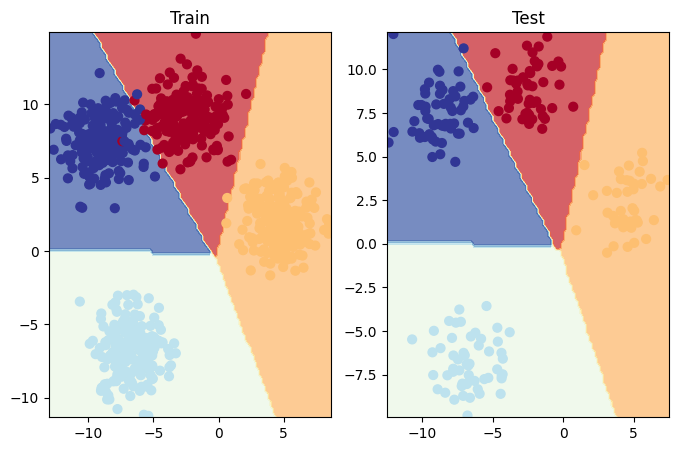

In [81]:
plt.figure(figsize=(8,5))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4,X_blob_test,y_blob_test)